#Movie Data Analysis
This tutorial mainly focuses on handling more complicate dataset

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt

##Create Dataframes
Use `pd.read_csv` from pandas to read the csv files and create two dataframes

In [56]:
# Read csv files and create dataframes
movies_df = pd.read_csv('/content/tmdb_5000_movies.csv')
credits_df = pd.read_csv('/content/tmdb_5000_credits.csv')

In [57]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [58]:
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


##Data Cleansing
Data cleansing is the first and a very crucial step in the overall data preparation process and is the process of analysing, identifying and correcting messy, raw data. When analysing organisational data to make strategic decisions you must start with a thorough data cleansing process.

In [59]:
# Drop the redundant columns
del_col_list = ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'homepage',
                'overview', 'production_companies', 'original_title', 'title']
movies_df = movies_df.drop(del_col_list, axis=1)
movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.1,2124


In [60]:
# Drop the duplicates from the dataset (if any).
print(movies_df.shape)
movies_df = movies_df.drop_duplicates(keep='first')
print(movies_df.shape)

(4803, 11)
(4803, 11)


In [61]:
# Handle zero-values in the dataset
cols = ['budget', 'revenue']
movies_df[cols] = movies_df[cols].replace(0, np.nan)

# Check the nums of rows contain NaN values
movies_df.isnull().sum()

budget                  1037
genres                     0
id                         0
popularity                 0
production_countries       0
release_date               1
revenue                 1427
runtime                    2
spoken_languages           0
vote_average               0
vote_count                 0
dtype: int64

In [62]:
# Drop NaN rows
movies_df.dropna(subset=cols, inplace=True)
movies_df.shape

(3229, 11)

In [63]:
# Convert the date time to Date Format and extract the year values
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])
movies_df['release_year'] = movies_df['release_date'].dt.year
movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,release_year
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",7.2,11800,2009
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,9.610000e+08,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.9,4500,2007
2,245000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,8.806746e+08,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",6.3,4466,2015
3,250000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1.084939e+09,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",7.6,9106,2012
4,260000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,2.841391e+08,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.1,2124,2012


In [64]:
# Changing budget and revenue columns format to integer using numpy’s int64 method
movies_df['budget'] = movies_df['budget'].astype(np.int64)
movies_df['revenue'] = movies_df['revenue'].astype(np.int64)
movies_df.dtypes

budget                           int64
genres                          object
id                               int64
popularity                     float64
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
vote_average                   float64
vote_count                       int64
release_year                     int64
dtype: object

In [65]:
# Now if you check the dataframe, you will notice that some columns contain JSON format information.
# We need to flat these columns' values from JSON format into lists.
# We can use a function to do so.
def parse_json(df, cols, key):
    for col in cols:
        for index, row in zip(df.index, df[col].apply(json.loads)):
            list1 = []
            for j in range(len(row)):
                list1.append((row[j][key]))  # the key 'name' contains the name of the genre
            df.loc[index,col]=str(list1)

    return df

cols = ['genres', 'spoken_languages', 'production_countries']
parse_json(movies_df, cols, 'name')

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,release_year
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",7.2,11800,2009
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],6.9,4500,2007
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",6.3,4466,2015
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],7.6,9106,2012
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],6.1,2124,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
4773,27000,['Comedy'],2292,19.748658,['United States of America'],1994-09-13,3151130,92.0,['English'],7.4,755,1994
4788,12000,"['Horror', 'Comedy', 'Crime']",692,4.553644,['United States of America'],1972-03-12,6000000,93.0,['English'],6.2,110,1972
4792,20000,"['Crime', 'Horror', 'Mystery', 'Thriller']",36095,0.212443,['Japan'],1997-11-06,99000,111.0,['日本語'],7.4,63,1997
4796,7000,"['Science Fiction', 'Drama', 'Thriller']",14337,23.307949,['United States of America'],2004-10-08,424760,77.0,['English'],6.9,658,2004


##Identify relationships between variables/features
The main goal here is to identify and create relationships which can help you to build a hypothesis. We’ll have to define questions which can help us build some relationships to look at.

In [66]:
# Write a function to find the top maximum and top minimum
def find_max_min(df, col):
    max_cols = df[col].idxmax(axis=0)
    top_cols = pd.DataFrame(df.loc[max_cols])

    min_cols = df[col].idxmin(axis=0)
    bottom_cols = pd.DataFrame(df.loc[min_cols])

    result_df = pd.concat([top_cols, bottom_cols], axis=1)
    return result_df

####Find the most expensive movies

In [67]:
# Exploring the most expensive movies,
# it can tell you if they were even worth the money
# spent on them based on their performance and revenue generated.
expensive_movies = movies_df.sort_values(by='budget', ascending=False)

In [68]:
expensive_movies.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,release_year
17,380000000,"['Adventure', 'Action', 'Fantasy']",1865,135.413856,['United States of America'],2011-05-14,1045713802,136.0,"['English', 'Español']",6.4,4948,2011
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],6.9,4500,2007
7,280000000,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,['United States of America'],2015-04-22,1405403694,141.0,['English'],7.3,6767,2015
10,270000000,"['Adventure', 'Fantasy', 'Action', 'Science Fi...",1452,57.925623,['United States of America'],2006-06-28,391081192,154.0,"['English', 'Français', 'Deutsch']",5.4,1400,2006
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],6.1,2124,2012


In [69]:
expensive_movies.tail()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,release_year
4608,8,"['Fantasy', 'Horror', 'Thriller']",11980,11.818333,['United States of America'],1995-09-01,16,98.0,['English'],6.4,138,1995
3372,7,"['Thriller', 'Action', 'Horror', 'Science Fict...",13006,4.857028,['United Kingdom'],1992-05-01,5,90.0,['English'],5.7,63,1992
3419,7,"['Comedy', 'Drama', 'Foreign', 'Romance']",38415,0.050456,[],2009-08-09,7,82.0,[],5.2,6,2009
3611,4,"['Drama', 'Romance', 'War']",22649,1.199451,['United States of America'],1932-12-08,25,89.0,['English'],6.2,28,1932
4238,1,"['Drama', 'Comedy']",3082,28.276480,['United States of America'],1936-02-05,8500000,87.0,['English'],8.1,856,1936


###Find the most profitble movies

In [70]:
# Find the top 5 most profit movies
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']
movies_df.sort_values(by = ['profit'], ascending=False).head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,release_year,profit
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",7.2,11800,2009,2550965087
25,200000000,"['Drama', 'Romance', 'Thriller']",597,100.025899,['United States of America'],1997-11-18,1845034188,194.0,"['English', 'Français', 'Deutsch', 'svenska', ...",7.5,7562,1997,1645034188
28,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",135397,418.708552,['United States of America'],2015-06-09,1513528810,124.0,['English'],6.5,8662,2015,1363528810
44,190000000,['Action'],168259,102.322217,"['Japan', 'United States of America']",2015-04-01,1506249360,137.0,['English'],7.3,4176,2015,1316249360
16,220000000,"['Science Fiction', 'Action', 'Adventure']",24428,144.448633,['United States of America'],2012-04-25,1519557910,143.0,['English'],7.4,11776,2012,1299557910


###Find the most popular movies

In [71]:
# Find the top 5 most popular movies
popular_movies = movies_df.sort_values(by=['popularity'], ascending=False)
popular_movies.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,release_year,profit
546,74000000,"['Family', 'Animation', 'Adventure', 'Comedy']",211672,875.581305,['United States of America'],2015-06-17,1156730962,91.0,['English'],6.4,4571,2015,1082730962
95,165000000,"['Adventure', 'Drama', 'Science Fiction']",157336,724.247784,"['Canada', 'United States of America', 'United...",2014-11-05,675120017,169.0,['English'],8.1,10867,2014,510120017
788,58000000,"['Action', 'Adventure', 'Comedy']",293660,514.569956,['United States of America'],2016-02-09,783112979,108.0,['English'],7.4,10995,2016,725112979
94,170000000,"['Action', 'Science Fiction', 'Adventure']",118340,481.098624,"['United Kingdom', 'United States of America']",2014-07-30,773328629,121.0,['English'],7.9,9742,2014,603328629
127,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",76341,434.278564,"['Australia', 'United States of America']",2015-05-13,378858340,120.0,['English'],7.2,9427,2015,228858340


In [72]:
# Average runtime of movies
movies_df['runtime'].mean()

110.72437287085785

In [73]:
# Comparison the longest time and shortest time
find_max_min(movies_df, 'runtime')

,2384,3626
budget,18000000,5000000
genres,"['Crime', 'Drama', 'Thriller', 'History']",['Documentary']
id,43434,78394
popularity,1.138383,4.498368
production_countries,"['France', 'Germany']","['France', 'United Kingdom']"
release_date,2010-05-19 00:00:00,2010-05-14 00:00:00
revenue,871279,4074023
runtime,338.0,41.0
spoken_languages,"['Français', 'Deutsch', 'English', 'Español', ...",['English']
vote_average,6.7,5.9


In [74]:
# Find the movies that have higher than 7.0 rate
movies_df[movies_df['vote_average'] >= 7.0]

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,release_year,profit
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",7.2,11800,2009,2550965087
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],7.6,9106,2012,834939099
6,260000000,"['Animation', 'Family']",38757,48.681969,['United States of America'],2010-11-24,591794936,100.0,['English'],7.4,3330,2010,331794936
7,280000000,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,['United States of America'],2015-04-22,1405403694,141.0,['English'],7.3,6767,2015,1125403694
8,250000000,"['Adventure', 'Fantasy', 'Family']",767,98.885637,"['United Kingdom', 'United States of America']",2009-07-07,933959197,153.0,['English'],7.4,5293,2009,683959197
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4713,160000,"['Documentary', 'History']",1779,3.284903,['United States of America'],1989-09-01,6706368,91.0,['English'],7.4,90,1989,6546368
4724,10000,"['Drama', 'Fantasy', 'Horror', 'Science Fiction']",985,20.399578,['United States of America'],1977-03-19,7000000,89.0,['English'],7.5,485,1977,6990000
4738,60000,"['Mystery', 'Drama', 'Thriller']",473,27.788067,['United States of America'],1998-07-10,3221152,84.0,['English'],7.1,586,1998,3161152
4773,27000,['Comedy'],2292,19.748658,['United States of America'],1994-09-13,3151130,92.0,['English'],7.4,755,1994,3124130


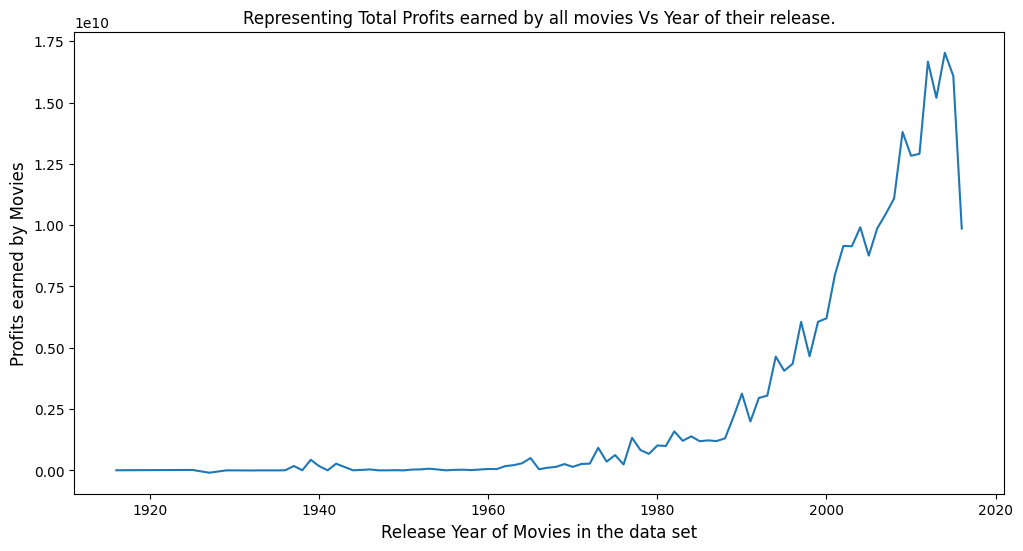

In [75]:
# Which year did we have the most profitable movies?
profits_year = movies_df.groupby('release_year')['profit'].sum()

plt.figure(figsize=(12,6))
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
plt.ylabel('Profits earned by Movies', fontsize = 12)
plt.title('Representing Total Profits earned by all movies Vs Year of their release.')
plt.plot(profits_year)

plt.show()

In [76]:
# Get the most profitable year
profits_year.idxmax(axis=0)

2014

###Find the most successful genre
bar plot explaining the frequency of movies in each genre.

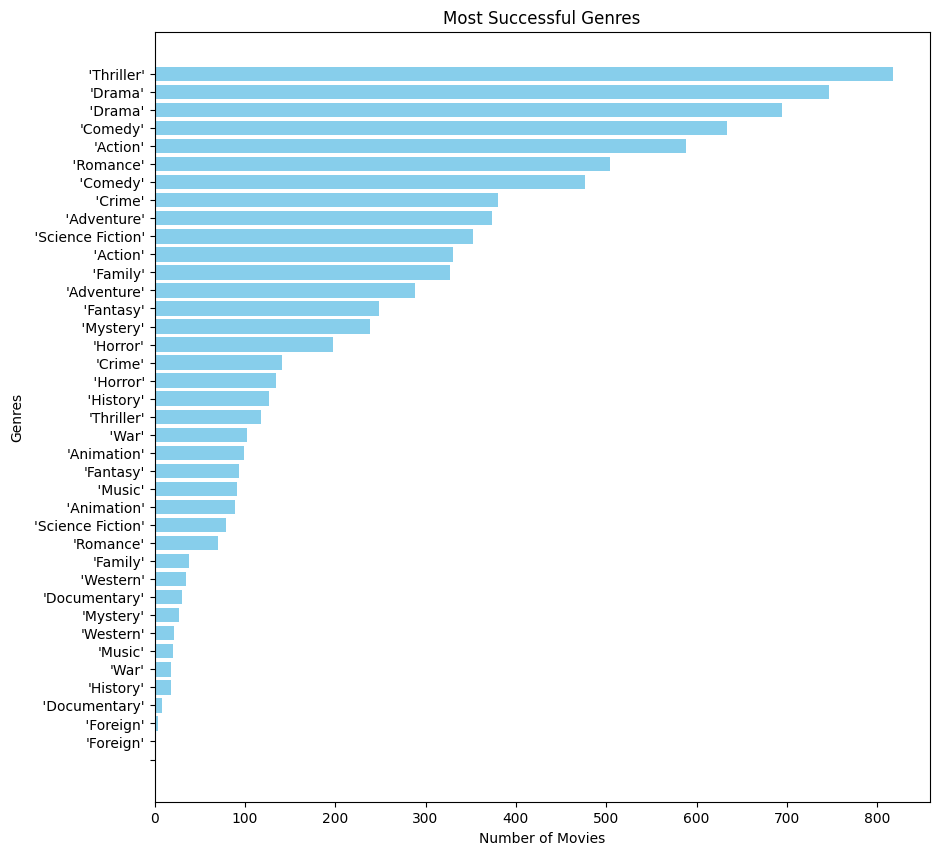

In [86]:
# Flatten the list of genres and count the occurrences of each genre
genre_count = {}

for genres in movies_df['genres']:
    for genre in genres[1:-1].split(','):
        if genre in genre_count:
            genre_count[genre] += 1
        else:
            genre_count[genre] = 1

# Sort the genres
sorted_genres = {k: v for k, v in sorted(genre_count.items(), key=lambda item: item[1])}

# Create the bar chart
plt.figure(figsize=(10, 10))
plt.barh(list(sorted_genres.keys()), list(sorted_genres.values()), color='skyblue')

# Add labels and title
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.title('Most Successful Genres')

# Show the plot
plt.show()


###Find the most common languages
bar plot explaining the frequency of movies in each language.

<ipython-input-107-83efd3a32abc>:24: UserWarning: Glyph 3108 (\N{TELUGU LETTER TA}) missing from current font.
  plt.tight_layout()
<ipython-input-107-83efd3a32abc>:24: UserWarning: Matplotlib currently does not support Telugu natively.
  plt.tight_layout()
<ipython-input-107-83efd3a32abc>:24: UserWarning: Glyph 3142 (\N{TELUGU VOWEL SIGN E}) missing from current font.
  plt.tight_layout()
<ipython-input-107-83efd3a32abc>:24: UserWarning: Glyph 3122 (\N{TELUGU LETTER LA}) missing from current font.
  plt.tight_layout()
<ipython-input-107-83efd3a32abc>:24: UserWarning: Glyph 3137 (\N{TELUGU VOWEL SIGN U}) missing from current font.
  plt.tight_layout()
<ipython-input-107-83efd3a32abc>:24: UserWarning: Glyph 3095 (\N{TELUGU LETTER GA}) missing from current font.
  plt.tight_layout()
<ipython-input-107-83efd3a32abc>:24: UserWarning: Glyph 2476 (\N{BENGALI LETTER BA}) missing from current font.
  plt.tight_layout()
<ipython-input-107-83efd3a32abc>:24: UserWarning: Matplotlib currently does

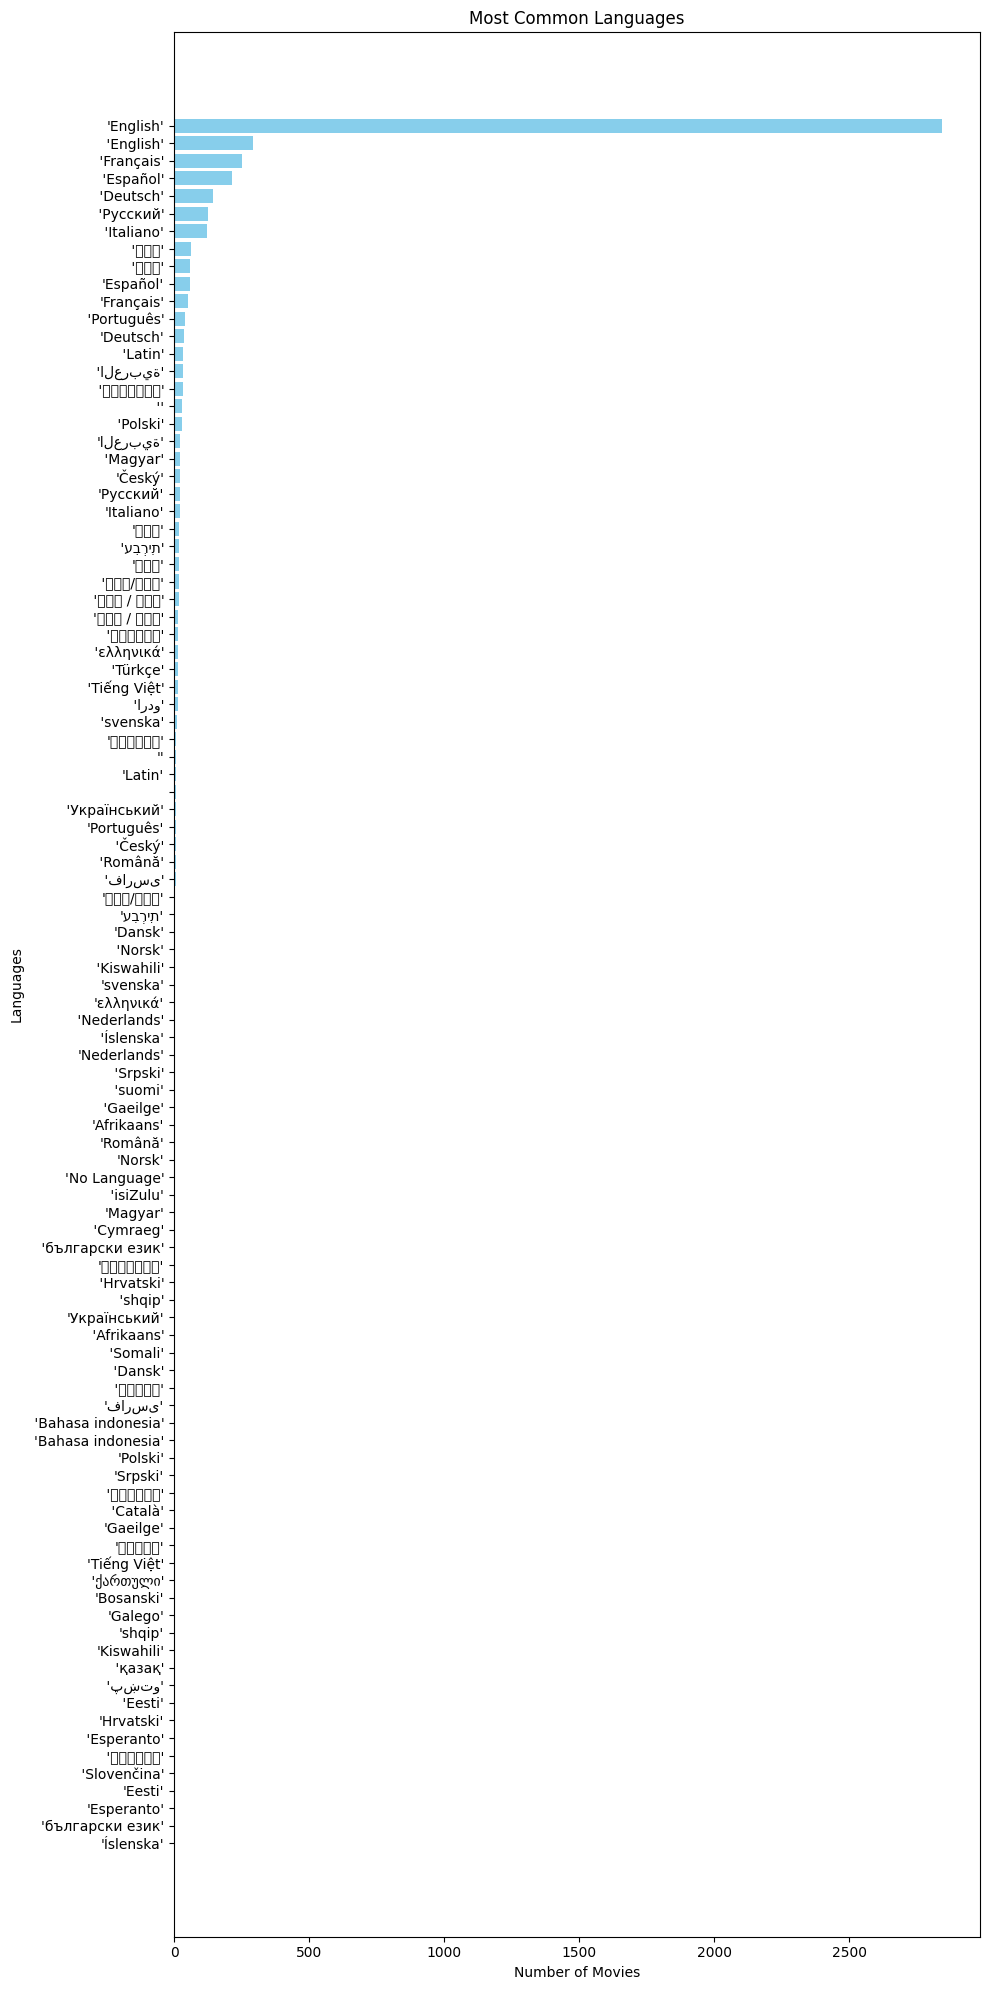

In [107]:
# Flat the language list into dict
language_dict = {}

for languages in movies_df['spoken_languages']:
    for language in languages[1:-1].split(','):
        if language in language_dict:
            language_dict[language] += 1
        else:
            language_dict[language] = 1

# Sort the genres
sorted_languages = {k: v for k, v in sorted(language_dict.items(), key=lambda item: item[1])}

# Create the bar chart
plt.figure(figsize=(10, 20))
plt.barh(list(sorted_languages.keys()), list(sorted_languages.values()), color='skyblue')

# Add labels and title
plt.xlabel('Number of Movies')
plt.ylabel('Languages')
plt.title('Most Common Languages')

# Show the plot
plt.tight_layout()
plt.show()


###Average budget of the profitable movies
what is the average budget allocated

In [90]:
# Filter the DataFrame to include only profitable movies
profitable_movies = movies_df[movies_df['profit'] > 0].sort_values(by='profit', ascending=False)
profitable_movies.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,release_year,profit
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",7.2,11800,2009,2550965087
25,200000000,"['Drama', 'Romance', 'Thriller']",597,100.025899,['United States of America'],1997-11-18,1845034188,194.0,"['English', 'Français', 'Deutsch', 'svenska', ...",7.5,7562,1997,1645034188
28,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",135397,418.708552,['United States of America'],2015-06-09,1513528810,124.0,['English'],6.5,8662,2015,1363528810
44,190000000,['Action'],168259,102.322217,"['Japan', 'United States of America']",2015-04-01,1506249360,137.0,['English'],7.3,4176,2015,1316249360
16,220000000,"['Science Fiction', 'Action', 'Adventure']",24428,144.448633,['United States of America'],2012-04-25,1519557910,143.0,['English'],7.4,11776,2012,1299557910


In [91]:
# Calculate the average budget of profitable movies
average_budget = profitable_movies['budget'].mean()
print(f"The average budget of profitable movies is {average_budget}")

The average budget of profitable movies is 43345408.34864643


###Average duration of the most profitable movies.

In [93]:
# Sort the DataFrame by 'profit' in descending order
sorted_movies = movies_df.sort_values(by='profit', ascending=False)

# Optionally, you can select the top N most profitable movies
top_movies = sorted_movies.head(5)

# Calculate the average duration of the most profitable movies
average_duration = sorted_movies['runtime'].mean()

print(f"The average duration of the most profitable movies is {average_duration} minutes")

The average duration of the most profitable movies is 110.72437287085785 minutes


###Find the most common language of the top 5 most profiable movies

In [100]:
# Sort the DataFrame by 'profit' in descending order
sorted_movies = movies_df.sort_values(by='profit', ascending=False)
top_movies = sorted_movies.head(5)

# Flat the language list into dict
language_dict = {}

for languages in top_movies['spoken_languages']:
    for language in languages[1:-1].split(','):
        if language in language_dict:
            language_dict[language] += 1
        else:
            language_dict[language] = 1

# Get the most common language
sorted_languages = {k: v for k, v in sorted(language_dict.items(), key=lambda item: item[1])}
most_common_language = list(sorted_languages.keys())[-1]

print(f"The most common language is {most_common_language}")

The most common language is 'English'


##Reference:
- [Hitchhiker's guide to Exploratory Data Analysis](https://towardsdatascience.com/hitchhikers-guide-to-exploratory-data-analysis-6e8d896d3f7e/)